In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Load the dataset


In [3]:
data = pd.read_csv('magic04.data', header=None)

# Balance the dataset

In [4]:
gamma = data[data[10]=='g']
hadron = data[data[10]=='h']
b_gamma = gamma.sample(n=len(hadron), random_state=42)
data = pd.concat([b_gamma, hadron]).sample(frac=1,random_state=42).reset_index(drop=True)

# Splitting the dataset randomly

In [5]:
train, temp = train_test_split(data, test_size=0.3, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Separating the features and the target 

In [6]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_val = val.iloc[:, :-1]
y_val = val.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

# Scaling the features so that they have zero mean and unit variance

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Training the KNN model with different values of k

In [8]:


k_values = range(1, 150, 2)
results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_prediction = knn.predict(X_val)
    test_prediction = knn.predict(X_test)
    results[k] = {
    "val_accuracy": accuracy_score(y_val, val_prediction),
    "test_accuracy": accuracy_score(y_test, test_prediction),
    "val_precision": precision_score(y_val, val_prediction, average='weighted'),
    "val_recall": recall_score(y_val, val_prediction, average='weighted'),
    "val_f1_score": f1_score(y_val, val_prediction, average='weighted'),
    "val_report": classification_report(y_val, val_prediction, output_dict=True),
    "val_confusion_matrix": confusion_matrix(y_val, val_prediction),
}

# Plotting the validation and test accuracies

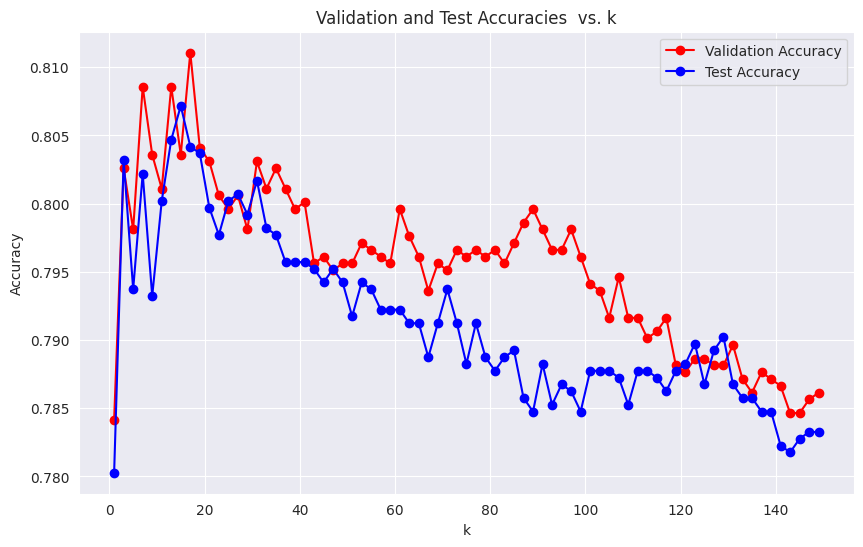

In [9]:
k_values = list(results.keys())
val_accuracies = [results[k]['val_accuracy'] for k in k_values]
test_accuracies = [results[k]['test_accuracy'] for k in k_values]


plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, marker='o', linestyle='-', color='r', label='Validation Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='b', label='Test Accuracy')
plt.title('Validation and Test Accuracies  vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Classification report

In [10]:
best_k = max(results, key=lambda k: results[k]['val_accuracy'])

accuracy = pd.DataFrame([results[best_k]['test_accuracy']], columns=['Accuracy'])
precision = pd.DataFrame([results[best_k]['test_precision']], columns=['Precision'])
recall = pd.DataFrame([results[best_k]['test_recall']], columns=['Recall'])
f1_score = pd.DataFrame([results[best_k]['test_f1_score']], columns=['F1-Score'])

print(f'Best k: {best_k}')
print(f'Accuracy: {accuracy.iloc[0, 0]:.2f}')
print(f'Precision: {precision.iloc[0, 0]:.2f}')
print(f'Recall: {recall.iloc[0, 0]:.2f}')
print(f'F1-Score: {f1_score.iloc[0, 0]:.2f}')

Best k: 17
Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1-Score: 0.80


# Display the validation confusion matrix for the best k

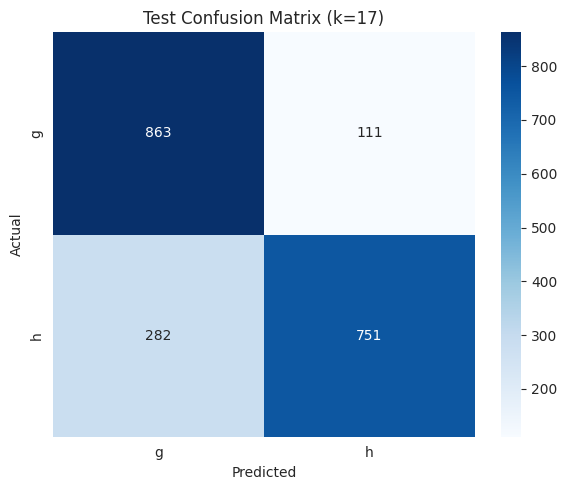

In [11]:
test_conf_matrix = results[best_k]['test_confusion_matrix']

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title(f'Test Confusion Matrix (k={best_k})')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.set_xticklabels(['g', 'h'])
ax.set_yticklabels(['g', 'h'])

plt.tight_layout()
plt.show()

## Comments on the results
- The best k value was found to be 17 using the validation dataset with a maximum validation accuracy of 0.81
- k values less than 17 displayed less accuracies due to a slight underfitting
- k values greater than 17 displayed less accuracies due to a slight overfitting
- However, The observation that the accuracies for different values of k are close indicates that the model's performance is relatively stable across a range of k values. This stability can be a positive sign, suggesting that the model is robust and not overly sensitive to the choice of k
